In [52]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from scipy import spatial
import cv2
import scipy as sp
from scipy import signal

In [53]:
def click_event(event, x, y, flags, params):
    global old_points, first_point;
    if event == cv2.EVENT_LBUTTONDOWN:
        old_points = np.array([[x,y,]], dtype=np.float32)
        first_point = old_points
# lucas kanade params
lk_param = dict(winSize=(350,350), maxLevel=24, criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10,0.03))
    

In [54]:
def compute_fft(s, sampling_rate, n = None, scale_amplitudes = True):
    '''Computes an FFT on signal s using numpy.fft.fft.
    
       Parameters:
        s (np.array): the signal
        sampling_rate (num): sampling rate
        n (integer): If n is smaller than the length of the input, the input is cropped. If n is 
            larger, the input is padded with zeros. If n is not given, the length of the input signal 
            is used (i.e., len(s))
        scale_amplitudes (boolean): If true, the spectrum amplitudes are scaled by 2/len(s)
    '''
    if n == None:
        n = len(s)
        
    fft_result = np.fft.fft(s, n)
    num_freq_bins = len(fft_result)
    fft_freqs = np.fft.fftfreq(num_freq_bins, d = 1 / sampling_rate)
    half_freq_bins = num_freq_bins // 2
 
    fft_freqs = fft_freqs[:half_freq_bins]
    fft_result = fft_result[:half_freq_bins]
    fft_amplitudes = np.abs(fft_result)
    
    if scale_amplitudes is True:
        fft_amplitudes = 2 * fft_amplitudes / (len(s))
    
    return (fft_freqs, fft_amplitudes)

In [55]:
#x = torch.load('traj_hist_tensor.pt') # old one with 250 pixels
x = torch.load('traj_hist_tensor-2.pt')
x = np.rint(x.numpy()).astype(int)
print(x.shape)

(1, 528, 2500, 2)


In [56]:
deltaChange = np.zeros((x.shape[1]-8-1,2))
pixelLocChange = np.zeros((x.shape[1]-8,2))

In [59]:
# playground to monitor multiple pixels and visualise them in the frames
showDifference = True
pt = [337, 152]  # <-- the point to find tip of nose


# for all frames in step of 8 frames
for i in range(8,x.shape[1],8):
    firstFrame = x[0,i,:,:]
    
    #firstPoint = firstFrame[spatial.KDTree(firstFrame).query(pt, k=[0,1])[1]] # <-- the nearest point
    indicesToTrack = spatial.KDTree(firstFrame).query(pt, k=[1])[1]
    print(firstFrame[indicesToTrack])
    print("\n\n")

[[339 155]]



[[339 155]]



[[339 155]]



[[339 155]]



[[339 155]]



[[339 155]]



[[339 155]]



[[339 155]]



[[339 155]]



[[339 155]]



[[339 155]]



[[339 155]]



[[339 155]]



[[339 155]]



[[339 155]]



[[339 155]]



[[339 155]]



[[339 155]]



[[339 155]]



[[339 155]]



[[339 155]]



[[339 155]]



[[339 155]]



[[339 155]]



[[339 155]]



[[339 155]]



[[339 155]]



[[339 155]]



[[339 155]]



[[339 155]]



[[339 155]]



[[339 155]]



[[339 155]]



[[339 155]]



[[339 155]]



[[339 155]]



[[339 155]]



[[339 155]]



[[339 155]]



[[339 155]]



[[339 155]]



[[339 155]]



[[339 155]]



[[339 155]]



[[339 155]]



[[339 155]]



[[339 155]]



[[339 155]]



[[339 155]]



[[339 155]]



[[339 155]]



[[339 155]]



[[339 155]]



[[339 155]]



[[339 155]]



[[339 155]]



[[339 155]]



[[339 155]]



[[339 155]]



[[339 155]]



[[339 155]]



[[339 155]]



[[339 155]]



[[339 155]]



[[339 155]]





In [65]:
showDifference = False
pt = [337, 152]  # <-- the point to find tip of nose
for i in range(8,x.shape[1],8):
    
    firstFrame = x[0,i,:,:]
    firstPoint = firstFrame[spatial.KDTree(firstFrame).query(pt)[1]] # <-- the nearest point 
    
    print("Given Point To Track {}, Point Found = {}".format(pt, firstPoint))
    print("Nearest Possible Index Is= {}\n".format(spatial.KDTree(firstFrame).query(pt, k=[3])[1]))
    
    deltaChange[i-8:i-8+7] = np.diff(x[0,i:i+8,indexToTrack,:],axis=0)
    pixelLocChange[i-8:i-8+8] = x[0,i:i+8,indexToTrack,:]
    
    if showDifference:
        print(np.diff(x[0,i:i+8,indexToTrack,:],axis=0))
        
    else:
        print(x[0,i:i+8,indexToTrack,:])
        
    print("\n")
    # update the point to track
    #pt = x[0,i+7,indexToTrack,:]

Given Point To Track [337, 152], Point Found = [339 155]
Nearest Possible Index Is= [1126]

[[339 155]
 [339 156]
 [345 154]
 [349 152]
 [351 154]
 [351 160]
 [351 159]
 [356 157]]


Given Point To Track [337, 152], Point Found = [339 155]
Nearest Possible Index Is= [1126]

[[339 155]
 [332 158]
 [316 162]
 [313 163]
 [312 163]
 [319 163]
 [327 163]
 [340 164]]


Given Point To Track [337, 152], Point Found = [339 155]
Nearest Possible Index Is= [1126]

[[339 155]
 [341 154]
 [339 154]
 [338 156]
 [336 158]
 [334 161]
 [331 162]
 [333 160]]


Given Point To Track [337, 152], Point Found = [339 155]
Nearest Possible Index Is= [1126]

[[339 155]
 [346 157]
 [355 158]
 [365 158]
 [371 157]
 [382 151]
 [390 145]
 [397 143]]


Given Point To Track [337, 152], Point Found = [339 155]
Nearest Possible Index Is= [1126]

[[339 155]
 [340 158]
 [339 165]
 [331 170]
 [319 173]
 [305 176]
 [287 176]
 [256 174]]


Given Point To Track [337, 152], Point Found = [339 155]
Nearest Possible Index Is= [

In [38]:
x_init = 337
y_init = 152

frameLeft = x.shape[1]-8 #set this later
isSparseOF = True
fps = 8.737238044062332
# This cell will find out the frame number corresponding to the timestamp of interest
# location fo the file
filenameWithPath = '../../../Documents/thermal-project-data/cycling/split/20221014T111320-clip3.MP4'
cap = cv2.VideoCapture(filenameWithPath)
# get the frame rate
fps = cap.get(cv2.CAP_PROP_FPS)
correct,frame = cap.read()
height, width, channel = frame.shape

print("Original Height = {}, Original Width = {}\n".format(height, width))

frame = cv2.resize(frame, (640, 360))
 # convert the first frame to grayscale
prev_gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
# keep a tab of the frame count
frameNumber = 1
frameLeft-=1
print("Total number of frames = {}".format(frameLeft))
intensityMap = []
# list to store all the ROI's sum of pixels for each frame of each video
rrSignal = []
# list to store temperature value of ROI in each frame
frame_temp_list = []


if isSparseOF:
    # show the first frame. imshow requires param to be in BGR format unlike Matplotlib's RGB
    cv2.imshow('image', frame)
    #b,g,r = cv2.split(frame)
    #frame = cv2.merge((r,g,b))
    # hook the function to be called in case of mouse click
    cv2.setMouseCallback('image', click_event)
    # wait infinitely until a key is pressed.
    cv2.waitKey(0)


while frameLeft and correct:
    # read the first frame of the video
    correct,frame = cap.read()
    frame = cv2.resize(frame, (640, 360))
    gray_frame = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    
    
    
    # get the size of the frame
    height, width, channel = frame.shape
    # create a all-zeros mask, we are doing this to get all the pixels covered by the circle
    mask = np.zeros((height, width), np.uint8)
    
    
    
    if isSparseOF:
        # get the new points for optical flow
        new_points, status, error = cv2.calcOpticalFlowPyrLK(prev_gray, gray_frame, old_points, None, **lk_param)
        # update the old frame to the current frame
        prev_gray = gray_frame.copy()
        # update the old points to new points
        old_points = new_points
        # make arrangements to plot the points
        x,y = new_points.ravel()
        x_i, y_i = first_point.ravel()
        cv2.circle(frame, (int(x),int(y)),2,(255,0,255),-1)
    
    
     # store or show pixel intensity
    try:
        if showDifference:
            
            if frameNumber%8==0:
                x_init = int(pixelLocChange[frameNumber][0])
                y_init = int(pixelLocChange[frameNumber][1])
                x_loc = x_init
                y_loc = y_init
            else:
                x_loc = x_init+int(deltaChange[frameNumber-1][0])
                y_loc = y_init+int(deltaChange[frameNumber-1][1])
                x_init = x_loc
                y_init = y_loc
            
            #print("FN = {}, XY = {},{}".format(frameNumber,x_loc,y_loc))
            intensityMap.append(gray_frame[x_loc][y_loc])
            cv2.circle(frame, (int(x_loc),int(y_loc)),50,(255,0,0),-1)
            # create the circle with new point over the mask as well
            circle_mask = cv2.circle(mask, (int(x_loc), int(y_loc)),50,(255,0,0),-1)
            masked_data = cv2.bitwise_and(gray_frame,gray_frame,mask=circle_mask)
            tom, thres = cv2.threshold(mask, 1,255, cv2.THRESH_BINARY)
            contours = cv2.findContours(thres, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            x,y,w,h = cv2.boundingRect(contours[0][0])
            crop = masked_data[y:y+h,x:x+w]
            frame_temp = crop
            frame_temp_list.append(np.sum(frame_temp[:,:])/(frame_temp.shape[0]*frame_temp.shape[1]))

            # now that we have the pixels corresponding to the ROI, lets sum of all pixels.
            sumPixels = np.sum(crop[:,:])
            # for each frame, store the sumPixel in an array. This array is the signal for RR
            rrSignal.append(sumPixels)
            
        else:
            x_loc = int(pixelLocChange[frameNumber][0])
            y_loc = int(pixelLocChange[frameNumber][1])
            intensityMap.append(gray_frame[x_loc][y_loc])
    except:
        print("Not tracked")
        #print(x_loc, y_loc)
        
        
    
    cv2.imshow('image', frame)
    key = cv2.waitKey(int((1/fps)*1000))
    if key == 27 or key == ord('q'):
        break
    

    frameLeft-=1;
    frameNumber+=1
    
cap.release()
cv2.destroyAllWindows()
rrSignal_t = [f/fps for f in range(1,len(rrSignal))]   

Original Height = 1440, Original Width = 1080

Total number of frames = 519
Initial Pixel = 298.0,149.0
Initial Pixel = 298.0,149.0
Initial Pixel = 298.0,149.0
Initial Pixel = 298.0,149.0
Initial Pixel = 298.0,149.0
Initial Pixel = 298.0,149.0
Initial Pixel = 298.0,149.0
Initial Pixel = 298.0,149.0
Initial Pixel = 298.0,149.0
Initial Pixel = 298.0,149.0
Initial Pixel = 298.0,149.0


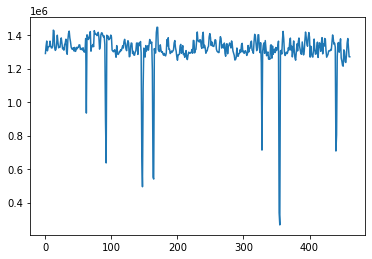

In [819]:
plt.plot(rrSignal)

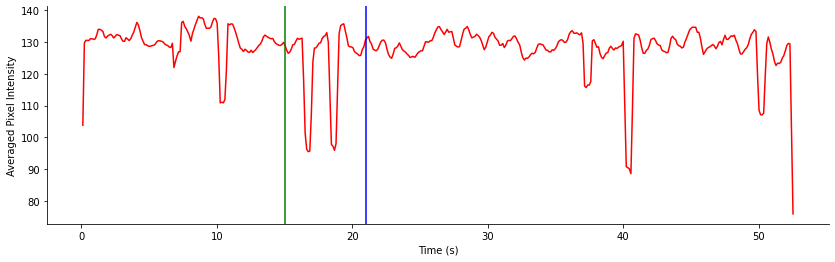

In [818]:
# forced-breathing-2

size = 5
window = sp.signal.gaussian(M=size, std=100)
window /= window.sum()
filteredA = np.convolve(np.array(frame_temp_list), window, mode='same')


# at the tip of the nose
fig, ax = plt.subplots(1,1, figsize=(14,4))
#ax.plot(rrSignal_t,frame_temp_list)
ax.plot(rrSignal_t,filteredA[1:],'r')

#ax.set_ylim((130,145))
#ax.set_xlim((210,500))
ax.set_xlabel("Time (s)")
ax.set_ylabel("Averaged Pixel Intensity")
plt.axvline(x = 15, color = 'g', label = '30s')
plt.axvline(x = 21, color = 'b', label = '120s')

#ax.legend(['Temperature', 'Recorded Post Staircase Climb', 'Recorded Post 1 Hour Rest'])
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
#ax.set_xlim((1,39))
#ax.set_ylim((140,160))

In [782]:
imap = intensityMap

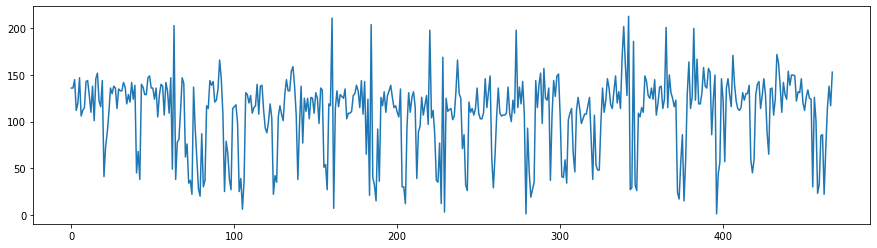

In [783]:
fig, ax = plt.subplots(1,1, figsize=(15,4))
ax.plot(imap)

0.3187612545534778


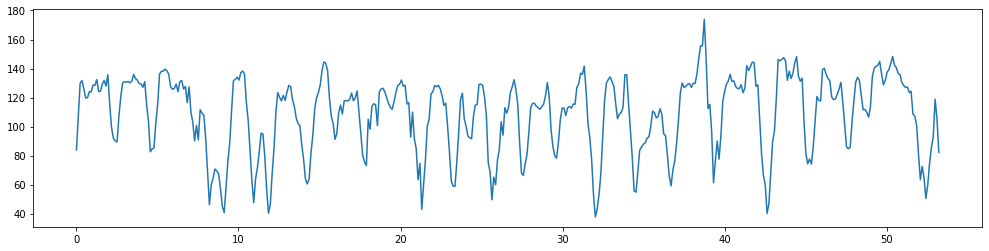

In [784]:
signal = imap
size = 5
window = sp.signal.gaussian(M=size, std=5)
window /= window.sum()
filteredA = np.convolve(signal, window, mode='same')



fig, ax = plt.subplots(1,1, figsize=(17,4))
ax.plot([i/fps for i in range(0,len(signal))], filteredA)
#ax.set_xlim(1,60)
F,A = compute_fft(filteredA, fps)
highestFreq = F[np.argmax(A[1:])+1]
print(highestFreq)

In [789]:
imap2 = intensityMap

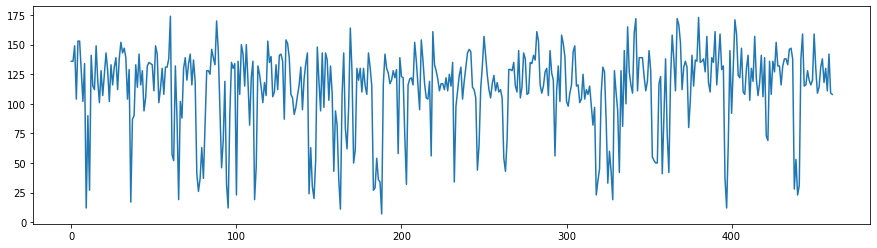

In [790]:
fig, ax = plt.subplots(1,1, figsize=(15,4))
ax.plot(imap2)

0.41787189672556746


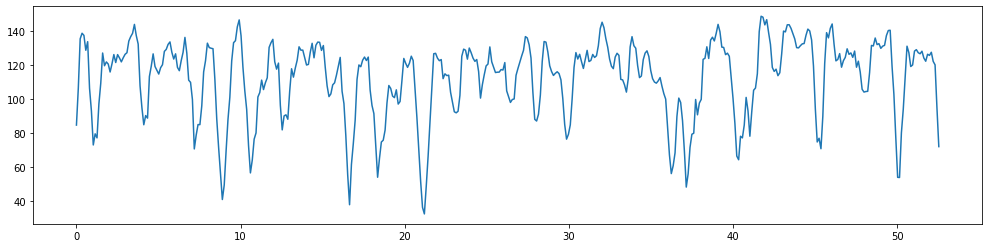

In [791]:
signal = imap2
size = 5
window = sp.signal.gaussian(M=size, std=5)
window /= window.sum()
filteredA = np.convolve(signal, window, mode='same')



fig, ax = plt.subplots(1,1, figsize=(17,4))
ax.plot([i/fps for i in range(0,len(signal))], filteredA)
#ax.set_xlim(1,60)
F,A = compute_fft(filteredA, fps)
highestFreq = F[np.argmax(A[1:])+1]
print(highestFreq)

In [40]:
empty = torch.empty((1,8,3,360,640))

In [47]:
random = torch.rand((1,8,3,360,640))

In [48]:
empty

tensor([[[[[6.3443e-01, 8.7547e-01, 4.4575e-01,  ..., 4.3753e-01,
            4.2873e-01, 4.1169e-01],
           [2.3264e-01, 6.8502e-01, 6.2760e-02,  ..., 7.6449e-01,
            6.7634e-01, 8.9732e-01],
           [7.0806e-01, 2.4972e-01, 4.5900e-01,  ..., 8.6076e-01,
            9.1573e-01, 2.0045e-01],
           ...,
           [9.1861e-01, 1.5560e-03, 4.8342e-01,  ..., 6.6306e-01,
            6.9216e-01, 8.5394e-01],
           [5.5389e-01, 7.8280e-01, 4.0612e-01,  ..., 4.2782e-02,
            7.2940e-01, 3.6063e-01],
           [4.2050e-01, 4.4387e-01, 2.5777e-01,  ..., 9.8405e-01,
            7.2329e-01, 6.6963e-01]],

          [[9.1701e-01, 9.0660e-01, 7.0320e-01,  ..., 3.0541e-02,
            8.7414e-01, 7.7085e-01],
           [5.1628e-01, 5.0405e-01, 1.1620e-01,  ..., 2.9945e-01,
            9.2432e-01, 2.9233e-01],
           [1.0907e-01, 1.3358e-01, 2.0752e-02,  ..., 7.7020e-01,
            2.7294e-01, 9.8909e-01],
           ...,
           [5.0188e-01, 9.9551e-02, 9.3

In [49]:
random

tensor([[[[[6.3673e-01, 3.0690e-01, 9.5525e-01,  ..., 3.8180e-01,
            1.7250e-01, 2.2948e-01],
           [7.7102e-01, 7.7057e-01, 7.3515e-01,  ..., 7.4305e-01,
            3.4394e-01, 7.3382e-01],
           [2.4437e-01, 7.8036e-01, 9.3291e-01,  ..., 1.2070e-01,
            6.5382e-01, 1.1026e-01],
           ...,
           [9.3184e-02, 6.6807e-01, 1.8288e-01,  ..., 2.4013e-02,
            8.9252e-01, 9.4352e-01],
           [3.1038e-01, 5.3033e-01, 5.8469e-02,  ..., 9.9267e-01,
            6.0876e-01, 9.3460e-01],
           [9.4355e-01, 7.5197e-01, 3.1933e-01,  ..., 7.8747e-01,
            1.8067e-01, 2.2147e-01]],

          [[2.5811e-01, 8.8056e-01, 7.8800e-02,  ..., 1.7185e-02,
            8.2182e-01, 8.9971e-01],
           [4.2180e-01, 3.7367e-01, 8.3206e-01,  ..., 6.0436e-01,
            7.7849e-01, 4.6421e-02],
           [2.2897e-01, 4.8713e-01, 8.7918e-01,  ..., 4.0877e-01,
            3.2721e-01, 9.9002e-01],
           ...,
           [9.1947e-01, 5.3603e-01, 6.2

In [50]:
empty.shape

torch.Size([1, 8, 3, 360, 640])

In [51]:
torch.cat((empty, random), dim=1).shape

torch.Size([1, 16, 3, 360, 640])